<a href="https://colab.research.google.com/github/KhotNoorin/Mini-Projects/blob/main/Sentiment_Analysis_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load IMDb Dataset

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
# Keep only the top 10,000 most frequently occurring words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Decode example review (to understand what tokens mean)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

In [ ]:
print("Example decoded review:")
print(decode_review(x_train[0]))

Example decoded review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they

# Preprocess Text Data (Padding)

In [ ]:
# Maximum sequence length (truncate or pad)
maxlen = 200

In [ ]:
# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_val, x_test_final, y_val, y_test_final = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Build the RNN Model

In [ ]:
vocab_size = 10000
embedding_dim = 64

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.6028 - loss: 0.6372 - val_accuracy: 0.8128 - val_loss: 0.4244
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 49s 146ms/step - accuracy: 0.8477 - loss: 0.3657 - val_accuracy: 0.8452 - val_loss: 0.3728
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.8991 - loss: 0.2656 - val_accuracy: 0.8394 - val_loss: 0.3947
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9270 - loss: 0.1972 - val_accuracy: 0.8266 - val_loss: 0.4746
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9606 - loss: 0.1171 - val_accuracy: 0.7747 - val_loss: 0.5782


# Evaluate the Model

In [ ]:
# Predict on test set
y_pred_probs = model.predict(x_test_final)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [ ]:
print("Test Accuracy:", accuracy_score(y_test_final, y_pred))

Test Accuracy: 0.78056


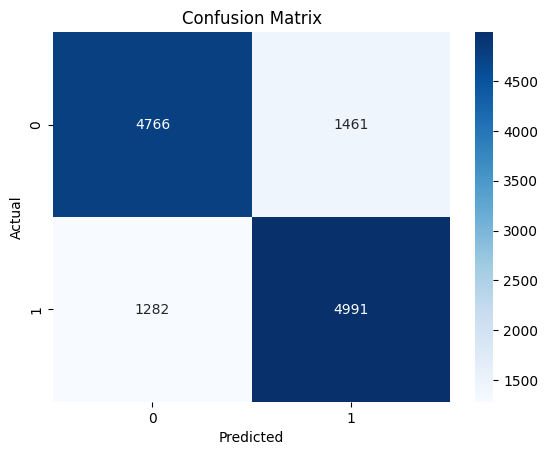

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test_final, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6227
           1       0.77      0.80      0.78      6273

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



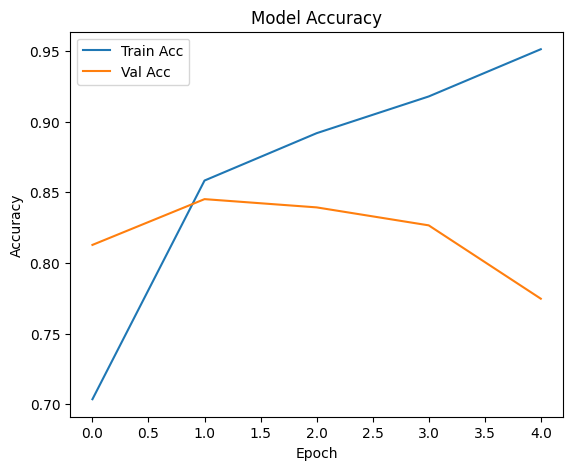

In [ ]:
# Accuracy plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

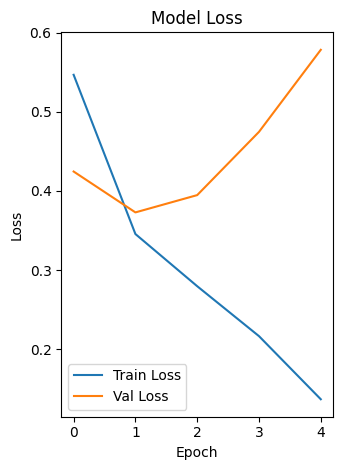

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



---

# From Scratch

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data = [
    ("i love this movie", 1), ("this film was fantastic", 1), ("brilliant acting", 1), ("great direction", 1),
    ("i enjoyed every minute", 1), ("what a masterpiece", 1), ("the story was gripping", 1), ("excellent plot", 1),
    ("superb movie experience", 1), ("outstanding cast", 1), ("amazing cinematography", 1), ("i was moved", 1),
    ("incredible script", 1), ("great soundtrack", 1), ("beautiful visuals", 1), ("truly inspiring", 1),
    ("emotional and powerful", 1), ("just perfect", 1), ("mind-blowing", 1), ("definitely recommend", 1),

    ("i liked the movie", 1), ("good film", 1), ("worth watching", 1), ("liked the story", 1),
    ("good direction", 1), ("well made", 1), ("strong characters", 1), ("fantastic performance", 1),
    ("great experience", 1), ("nicely done", 1),

    ("i hated this movie", 0), ("this film was terrible", 0), ("poor acting", 0), ("bad direction", 0),
    ("boring and slow", 0), ("what a disaster", 0), ("the story was nonsense", 0), ("weak plot", 0),
    ("awful movie experience", 0), ("horrible cast", 0), ("terrible cinematography", 0), ("i was annoyed", 0),
    ("ridiculous script", 0), ("bad soundtrack", 0), ("ugly visuals", 0), ("utterly disappointing", 0),
    ("emotionless and dull", 0), ("just awful", 0), ("mind-numbing", 0), ("do not recommend", 0),

    ("i disliked the movie", 0), ("waste of time", 0), ("not worth watching", 0), ("hated the story", 0),
    ("poorly directed", 0), ("badly made", 0), ("flat characters", 0), ("terrible performance", 0),
    ("bad experience", 0), ("badly done", 0),

    ("movie was good", 1), ("loved the acting", 1), ("script was tight", 1), ("the film was enjoyable", 1),
    ("impressive visuals", 1), ("highly entertaining", 1), ("deep message", 1), ("very well directed", 1),
    ("top-notch cast", 1), ("beautiful story", 1),

    ("movie was bad", 0), ("hated the acting", 0), ("script was loose", 0), ("the film was boring", 0),
    ("unimpressive visuals", 0), ("poorly written", 0), ("shallow message", 0), ("very poorly directed", 0),
    ("terrible cast", 0), ("horrible story", 0),

    ("it was okay", 1), ("not bad", 1), ("pretty good", 1), ("somewhat liked it", 1), ("a bit slow but nice", 1),
    ("could be better", 0), ("not impressive", 0), ("didn’t enjoy it", 0), ("not engaging", 0), ("forgettable", 0),
]

# Preprocessing

In [ ]:
# Tokenize and vocab
tokenized = [sentence.split() for sentence, _ in data]
vocab = sorted(set(word for sent in tokenized for word in sent))
word2idx = {w: i for i, w in enumerate(vocab)}
vocab_size = len(vocab)

max_len = max(len(sent) for sent in tokenized)
def encode(sentence):
    return [word2idx[word] for word in sentence] + [0]*(max_len - len(sentence))

In [ ]:
X = np.array([encode(sent) for sent in tokenized])
y = np.array([label for _, label in data]).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RNN model

In [ ]:
# Parameters
embed_size = 10
hidden_size = 16
epochs = 100
lr = 0.01

In [ ]:
np.random.seed(1)
E = np.random.randn(vocab_size, embed_size)
Wx = np.random.randn(embed_size, hidden_size)
Wh = np.random.randn(hidden_size, hidden_size)
bh = np.zeros((1, hidden_size))
Wo = np.random.randn(hidden_size, 1)
bo = np.zeros((1, 1))

In [ ]:
# Activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def dsigmoid(x): return sigmoid(x) * (1 - sigmoid(x))
def tanh(x): return np.tanh(x)
def dtanh(x): return 1 - np.tanh(x) ** 2
def binary_cross_entropy(pred, label):
    return -np.mean(label * np.log(pred + 1e-8) + (1 - label) * np.log(1 - pred + 1e-8))

# Training Loop

In [ ]:
losses = []

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X_train)):
        inputs = X_train[i]
        target = y_train[i]

        # Forward
        h = np.zeros((max_len + 1, hidden_size))
        for t in range(len(inputs)):
            xt = E[inputs[t]]
            h[t+1] = tanh(np.dot(xt, Wx) + np.dot(h[t], Wh) + bh)

        y_pred = sigmoid(np.dot(h[len(inputs)], Wo) + bo)
        loss = binary_cross_entropy(y_pred, target)
        total_loss += loss

        # Backprop
        dWo = (y_pred - target) * h[len(inputs)].reshape(-1, 1)
        dbo = (y_pred - target)

        dWh = np.zeros_like(Wh)
        dWx = np.zeros_like(Wx)
        dE = np.zeros_like(E)
        dbh = np.zeros_like(bh)
        dh_next = np.zeros_like(h[0])

        for t in reversed(range(len(inputs))):
          xt = E[inputs[t]]
          dh = ((y_pred - target) * Wo.T + dh_next)
          dt = dh * dtanh(np.dot(xt, Wx) + np.dot(h[t], Wh) + bh)

          dWh += np.outer(h[t], dt)
          dWx += np.outer(xt, dt)
          dbh += dt
          dE[inputs[t]] += np.dot(dt, Wx.T).flatten()  # ✅ fixed here
          dh_next = np.dot(dt, Wh.T)


        # Update
        Wo -= lr * dWo
        bo -= lr * dbo
        Wh -= lr * dWh
        Wx -= lr * dWx
        bh -= lr * dbh
        E -= lr * dE

    avg_loss = total_loss / len(X_train)
    losses.append(avg_loss)
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

Epoch 1/100 - Loss: 1.3757
Epoch 11/100 - Loss: 0.3386
Epoch 21/100 - Loss: 0.1738
Epoch 31/100 - Loss: 0.0675
Epoch 41/100 - Loss: 0.0468
Epoch 51/100 - Loss: 0.0336
Epoch 61/100 - Loss: 0.0219
Epoch 71/100 - Loss: 0.0148
Epoch 81/100 - Loss: 0.0118
Epoch 91/100 - Loss: 0.0084
Epoch 100/100 - Loss: 0.0073


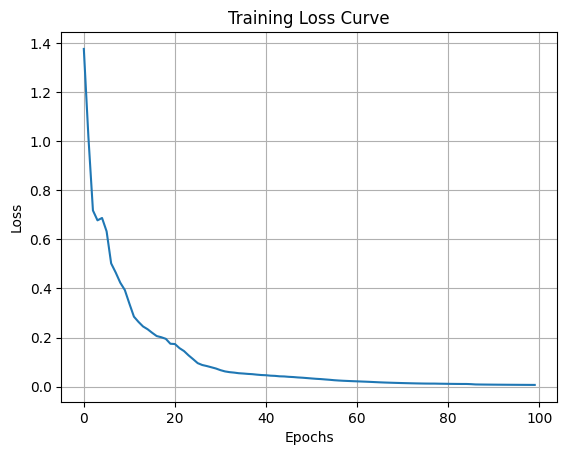

In [ ]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

In [ ]:
# Predict all samples and evaluate
all_X = np.array([encode(sent.split()) for sent, _ in data])
all_y = np.array([label for _, label in data])

all_preds = []
all_scores = []

In [ ]:
for i in range(len(all_X)):
    inputs = all_X[i]
    h = np.zeros((max_len + 1, hidden_size))
    for t in range(len(inputs)):
        xt = E[inputs[t]]
        h[t+1] = tanh(np.dot(xt, Wx) + np.dot(h[t], Wh) + bh)
    y_pred = sigmoid(np.dot(h[len(inputs)], Wo) + bo)
    all_scores.append(y_pred[0][0])
    all_preds.append(1 if y_pred[0][0] >= 0.5 else 0)

In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
acc = accuracy_score(all_y, all_preds)
print("Overall Accuracy on Full 100+ Sample Dataset:", round(acc * 100, 2), "%")

Overall Accuracy on Full 100+ Sample Dataset: 84.44 %


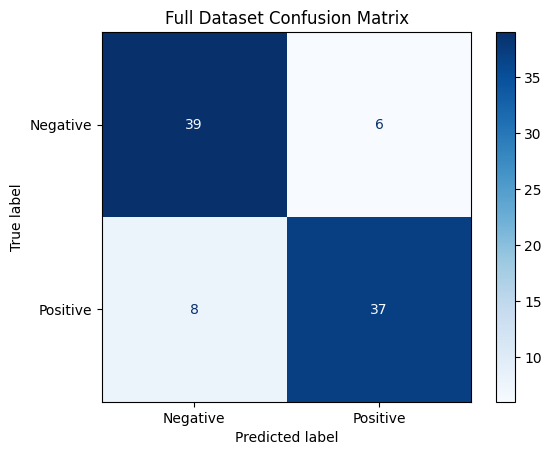

In [ ]:
# Confusion Matrix
cm = confusion_matrix(all_y, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Full Dataset Confusion Matrix")
plt.show()

In [ ]:
print("Mismatched Predictions:")
for i, (true, pred, score) in enumerate(zip(all_y, all_preds, all_scores)):
    if true != pred:
        print(f"{i+1:02d}. True: {true}, Pred: {pred}, Score: {score:.2f}, Sentence: \"{data[i][0]}\"")

Mismatched Predictions:
01. True: 1, Pred: 0, Score: 0.00, Sentence: "i love this movie"
11. True: 1, Pred: 0, Score: 0.00, Sentence: "amazing cinematography"
13. True: 1, Pred: 0, Score: 0.00, Sentence: "incredible script"
23. True: 1, Pred: 0, Score: 0.01, Sentence: "worth watching"
27. True: 1, Pred: 0, Score: 0.00, Sentence: "strong characters"
31. True: 0, Pred: 1, Score: 0.80, Sentence: "i hated this movie"
34. True: 0, Pred: 1, Score: 0.64, Sentence: "bad direction"
45. True: 0, Pred: 1, Score: 0.95, Sentence: "ugly visuals"
50. True: 0, Pred: 1, Score: 1.00, Sentence: "do not recommend"
63. True: 1, Pred: 0, Score: 0.00, Sentence: "script was tight"
66. True: 1, Pred: 0, Score: 0.00, Sentence: "highly entertaining"
74. True: 0, Pred: 1, Score: 0.71, Sentence: "the film was boring"
82. True: 1, Pred: 0, Score: 0.00, Sentence: "not bad"
87. True: 0, Pred: 1, Score: 0.82, Sentence: "not impressive"


In [ ]:
print(predict_sentence("good film"))

0.9989652410423417


In [ ]:
print(predict_sentence("i disliked"))

0.02638817422721045


In [ ]:
print(predict_sentence("not good film"))

0.33006333639569785


In [ ]:
print(predict_sentence("it was boring"))

0.48996131642577584
